This notebook is an introduction to Keras using Tensorflow as a backend.  The purpose of the notebook is to train a simple deep learning network using the MNIST data set to automate the identification of handwriten numbers.  

The data set includes 60,000 training images and 10,000 test images.

In [2]:
import tensorflow as tf
import os
import time
os.environ["TF_CPP_MIN_LOG_LEVEL"]= "2"
print("tensorflow Version is: " + str(tf.__version__))

os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras import backend as K
print(os.environ['KERAS_BACKEND'])

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,8) # magnification to make the pictures a bit more readable

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

tensorflow Version is: 1.12.0
tensorflow

In [3]:
nb_classes = 10 #0-9

# the dataset is common and already prepared
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)

Let's have a look, just in case...

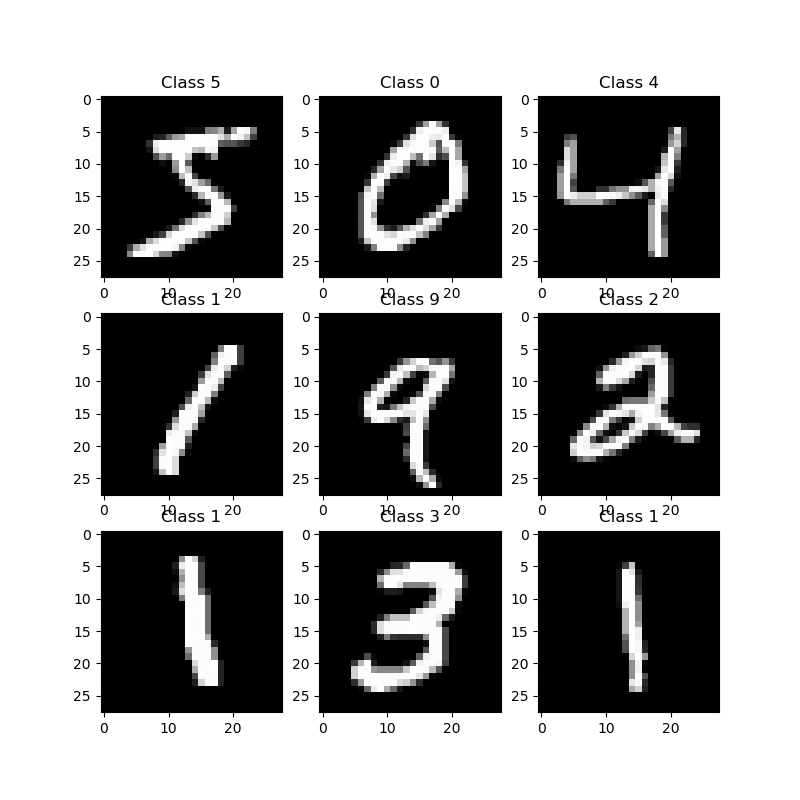

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
#plt.show()
display()

Reshape the images to be 28*28 and scale them to be 0-1 rather than 0-255.

In [7]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training vector shape", X_train.shape)
print("Testing vector shape", X_test.shape)

Training vector shape (60000, 784)
Testing vector shape (10000, 784)

One-hot encode the training and test labels: only 1 class is correct so
0->[1,0,0,0,0,0,0,0,0,0], 
1->[0,1,0,0,0,0,0,0,0,0], etc...

In [9]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [10]:
# The model will be constructed to include 3 layers, fully connected 784 inputs -> 512 hidden nodes -> 10 outputs (1 out of 10 classe)

model = Sequential()
model.add(Dense(512, input_shape=(784,))) # First hiddel layer size 512 and input 784
model.add(Activation('relu'))             # ReLU activation                           
model.add(Dropout(0.2))                   # Dropout regularization
model.add(Dense(512))                     # Second hidden layer 
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))                      # Output layer
model.add(Activation('softmax'))          # Softmax activation for multi-class problems

## Compile the model 
We specify a loss function, an optimizer and the metrics for evaluation.
For multi-class problems we use categorical cross-entropy.
The optimizer is stochastic gradient descent. If time allows, try 'adam' or 'adagrad', add momentum and decay.

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## Train the model
If time allows, try out different batch sizes and number of epochs

In [14]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=20, verbose=1,
          validation_data=(X_test, Y_test),
          callbacks=[EarlyStopping(verbose=1, patience=5, monitor='val_loss')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

 128/60000 [..............................] - ETA: 1:36 - loss: 2.4300 - acc: 0.0938
 2176/60000 [>.............................] - ETA: 6s - loss: 2.3188 - acc: 0.1356 
 4224/60000 [=>............................] - ETA: 4s - loss: 2.2629 - acc: 0.1832
 6272/60000 [==>...........................] - ETA: 3s - loss: 2.2151 - acc: 0.2364
 8320/60000 [===>..........................] - ETA: 2s - loss: 2.1716 - acc: 0.2822
10368/60000 [====>.........................] - ETA: 2s - loss: 2.1213 - acc: 0.3330
12416/60000 [=====>........................] - ETA: 1s - loss: 2.0756 - acc: 0.3707
14464/60000 [======>.......................] - ETA: 1s - loss: 2.0287 - acc: 0.4058
16512/60000 [=======>......................] - ETA: 1s - loss: 1.9801 - acc: 0.4361
18560/60000 [========>.....................] - ETA: 1s - loss: 1.9325 - acc: 0.4612
20736/60000 [=========>....................] - ETA: 1s - loss: 1.8824 - acc: 0.4846
22912/60000 [==========>...................] - ETA: 1s - loss: 1.8318 - acc: 0.5063
25088/60000 [===========>..................] - ETA: 1s - loss: 1.7847 - acc: 0.5255
27264/60000 [============>.................] - ETA: 1s - loss: 1.7389 - acc: 0.5422
29440/60000 [=============>................] - ETA: 0s - loss: 1.6953 - acc: 0.5573
31360/60000 [==============>...............] - ETA: 0s - loss: 1.6550 - acc: 0.5697
33536/60000 [===============>..............] - ETA: 0s - loss: 1.6132 - acc: 0.5824
35712/60000 [================>.............] - ETA: 0s - loss: 1.5738 - acc: 0.5945
37888/60000 [=================>............] - ETA: 0s - loss: 1.5358 - acc: 0.6049
40064/60000 [===================>..........] - ETA: 0s - loss: 1.4996 - acc: 0.6146
42240/60000 [====================>.........] - ETA: 0s - loss: 1.4670 - acc: 0.6224
44416/60000 [=====================>........] - ETA: 0s - loss: 1.4358 - acc: 0.6305
46592/60000 [======================>.......] - ETA: 0s - loss: 1.4057 - acc: 0.6385
48768/60000 [=======================>......] - ETA: 0s - loss: 1.3778 - acc: 0.6459
50944/60000 [========================>.....] - ETA: 0s - loss: 1.3513 - acc: 0.6524
53120/60000 [=========================>....] - ETA: 0s - loss: 1.3260 - acc: 0.6585
55296/60000 [==========================>...] - ETA: 0s - loss: 1.3019 - acc: 0.6647
57472/60000 [===========================>..] - ETA: 0s - loss: 1.2791 - acc: 0.6704
59648/60000 [============================>.] - ETA: 0s - loss: 1.2562 - acc: 0.6763
60000/60000 [==============================] - 2s 30us/step - loss: 1.2523 - acc: 0.6774 - val_loss: 0.5505 - val_acc: 0.8699
Epoch 2/20

 128/60000 [..............................] - ETA: 2s - loss: 0.8233 - acc: 0.7422
 2304/60000 [>.............................] - ETA: 1s - loss: 0.6731 - acc: 0.8138
 4480/60000 [=>............................] - ETA: 1s - loss: 0.6576 - acc: 0.8179
 6656/60000 [==>...........................] - ETA: 1s - loss: 0.6443 - acc: 0.8217
 8832/60000 [===>..........................] - ETA: 1s - loss: 0.6375 - acc: 0.8231
10752/60000 [====>.........................] - ETA: 1s - loss: 0.6311 - acc: 0.8254
12928/60000 [=====>........................] - ETA: 1s - loss: 0.6245 - acc: 0.8277
15104/60000 [======>.......................] - ETA: 1s - loss: 0.6168 - acc: 0.8302
17280/60000 [=======>......................] - ETA: 1s - loss: 0.6078 - acc: 0.8321
19456/60000 [========>.....................] - ETA: 0s - loss: 0.6011 - acc: 0.8323
21632/60000 [=========>....................] - ETA: 0s - loss: 0.5997 - acc: 0.8324
23808/60000 [==========>...................] - ETA: 0s - loss: 0.5971 - acc: 0.8334
25984/60000 [===========>..................] - ETA: 0s - loss: 0.5913 - acc: 0.8349
28160/60000 [=============>................] - ETA: 0s - loss: 0.5873 - acc: 0.8363
30208/60000 [==============>...............] - ETA: 0s - loss: 0.5845 - acc: 0.8371
32384/60000 [===============>..............] - ETA: 0s - loss: 0.5816 - acc: 0.8382
34560/60000 [======

In [15]:
score = model.evaluate(X_test, Y_test,
                       verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.1439421983025968
Test accuracy: 0.9582

In [16]:
# The predict_classes function outputs the highest probability class as scored by the model
predicted_classes = model.predict_classes(X_test)

# Check which items were predicted correctly or incorrectly 
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

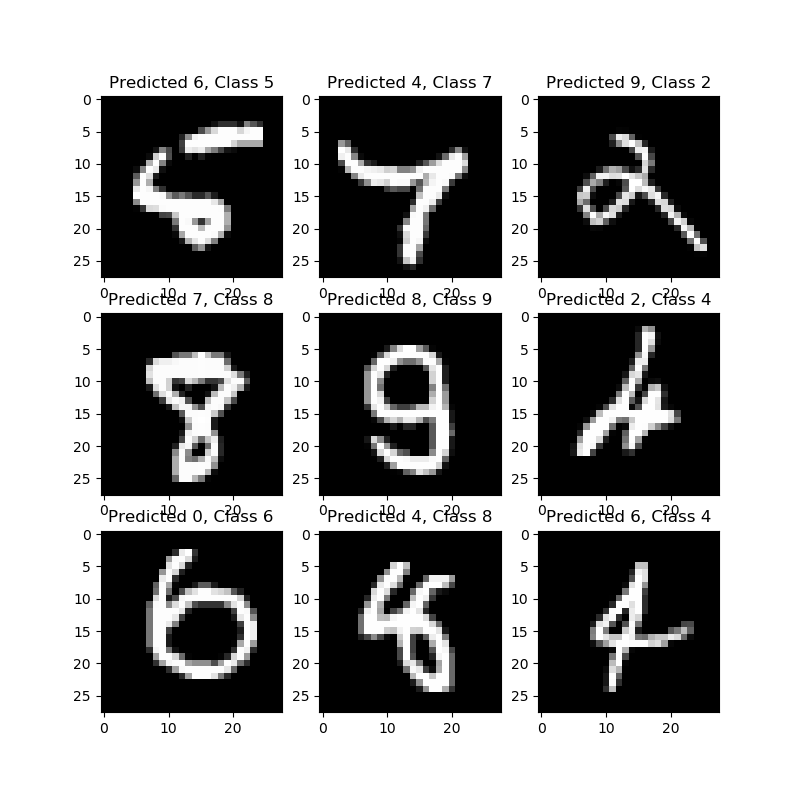

In [17]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

display()